In [1]:
import json

import os

import re

from pprint import pprint

import string

import json

from tqdm.notebook import tqdm

import MeCab

import nltk

import platform

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

import numpy as np

In [2]:
def pos(text):
    p = re.compile(".+\t[A-Z]+")
    return [tuple(p.match(line).group().split("\t")) for line in MeCab.Tagger().parse(text).splitlines()[:-1]]

def morphs(text):
    p = re.compile(".+\t[A-Z]+")
    return [p.match(line).group().split("\t")[0] for line in MeCab.Tagger().parse(text).splitlines()[:-1]]

def nouns(text):
    p = re.compile(".+\t[A-Z]+")
    temp = [tuple(p.match(line).group().split("\t")) for line in MeCab.Tagger().parse(text).splitlines()[:-1]]
    nouns=[]
    for word in temp:
        if word[1] in ["NNG", "NNP", "NNB", "NNBC", "NP", "NR"]:
            nouns.append(word[0])
    return nouns

def cln(text):
    return re.sub("[^가-힣 ]", "", text)

def def_sw(path):
    sw = set()
    for i in string.punctuation:
        sw.add(i)
    with open(path, encoding="utf-8") as f:
        for word in f:
            sw.add(word.split("\n")[0])
    return sw

In [3]:
sw = def_sw("C:/Users/5CG7092POZ/stopwords-ko.txt")

In [4]:
# %%time
# with open("C:/Users/5CG7092POZ/nsmc-master/ratings_train.txt", encoding="utf-8") as f:
#     train_docs = [line.split("\t") for line in f.read().splitlines()][1:]
    
# train_data = []
# for line in tqdm(train_docs):
#     review = line[1]
#     label = line[2]
#     review_tkn = nouns(cln(review))
#     review_tkn = [word for word in review_tkn if (word not in sw)]
#     train_data.append((review_tkn, label))

# with open("C:/Users/5CG7092POZ/train_data.json", "w", encoding="utf-8") as f:
#     json.dump(train_data, f, ensure_ascii=False, indent="\t")
    
# with open("C:/Users/5CG7092POZ/nsmc-master/ratings_test.txt", encoding="utf-8") as f:
#     test_docs = [line.split("\t") for line in f.read().splitlines()][1:]

# test_data = []
# for line in tqdm(test_docs):
#     review = line[1]
#     label = line[2]
#     review_tkn = nouns(cln(review))
#     review_tkn = [word for word in review_tkn if (word not in sw)]
#     test_data.append((review_tkn, label))
    
# with open("C:/Users/5CG7092POZ/test_data.json", "w", encoding="utf-8") as f:
#     json.dump(test_data, f, ensure_ascii=False, indent="\t")

In [15]:
with open("C:/Users/5CG7092POZ/train_data.json", "r", encoding="utf-8") as f:
    train_data = json.load(f)
    
with open("C:/Users/5CG7092POZ/test_data.json", "r", encoding="utf-8") as f:
    test_data = json.load(f)

In [16]:
tot_tkns = [word for line in train_data for word in line[0]]

text = nltk.Text(tot_tkns, name='NMSC')

text.vocab().most_common(20)

[('영화', 57601),
 ('점', 7794),
 ('거', 7627),
 ('수', 7489),
 ('연기', 6826),
 ('최고', 6575),
 ('평점', 6277),
 ('스토리', 5415),
 ('말', 5213),
 ('드라마', 5184),
 ('생각', 5167),
 ('내', 5054),
 ('사람', 5037),
 ('게', 5009),
 ('듯', 4991),
 ('감동', 4858),
 ('배우', 4424),
 ('내용', 4243),
 ('감독', 4187),
 ('재미', 4112)]

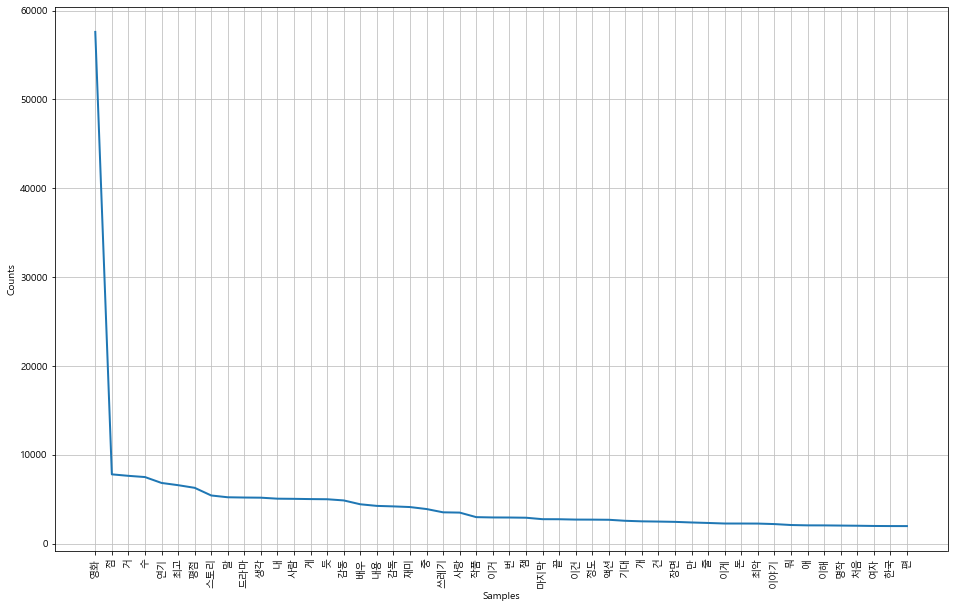

In [17]:
path = "c:/Windows/Fonts/malgun.ttf"
if platform.system() == 'Darwin':
    mpl.rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = mpl.font_manager.FontProperties(fname=path).get_name()
    mpl.rc('font', family=font_name)

plt.figure(figsize=(16, 10))

text.plot(50)

In [18]:
train_x = [" ".join(review) for review, _ in train_data]
test_x = [" ".join(review) for review, _ in test_data]
train_y = [label for _, label in train_data]
test_y = [label for _, label in test_data]

train_x = train_x[:50000]
train_y = train_y[:50000]
test_x = test_x[:25000]
test_y = test_y[:25000]

In [19]:
model1 = Pipeline([("vect", CountVectorizer()), ("model", SGDClassifier(loss="perceptron", penalty="l2", alpha=1e-4, random_state=42, max_iter=100))])

model2 = Pipeline([("vect", CountVectorizer()), ("model", SVC(kernel="linear"))])

model3 = Pipeline([("vect", CountVectorizer()), ("model", SVC(kernel="poly", degree=8))])

model4 = Pipeline([("vect", CountVectorizer()), ("model", SVC(kernel="rbf"))])

model5 = Pipeline([("vect", CountVectorizer()), ("model", SVC(kernel="sigmoid"))])

model6 = Pipeline([("vect", CountVectorizer()), ("model", MultinomialNB())])

model = model2

Wall time: 999 µs


In [ ]:
%%time
model.fit(train_x, train_y)

train_pred = model.predict(train_x)
train_acc = np.mean(train_pred == train_y)

test_pred = model.predict(test_x)
test_acc = np.mean(test_pred == test_y)

print("train_acc : %.2f" % train_acc)
print("Test_acc : %.2f" % test_acc)